Epoch[100/1000],loss:0.274454
Epoch[200/1000],loss:0.269192
Epoch[300/1000],loss:0.264193
Epoch[400/1000],loss:0.259444
Epoch[500/1000],loss:0.254934
Epoch[600/1000],loss:0.250649
Epoch[700/1000],loss:0.246579
Epoch[800/1000],loss:0.242712
Epoch[900/1000],loss:0.239039
Epoch[1000/1000],loss:0.235550


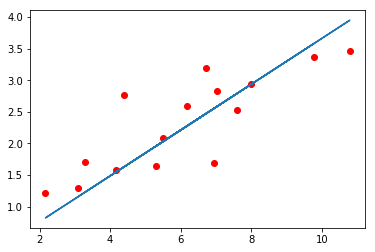

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# @Date    : 2018-09-17 17:35:04
# @Author  : Guosheng Kang (guoshengkang@gmail.com)
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
import torch
from torch import nn
from torch.autograd import Variable
%matplotlib inline

x_train=np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,3.1],dtype=np.float32)
y_train=np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.94,1.3],dtype=np.float32)
x_train=x_train.reshape((len(x_train),1))
y_train=y_train.reshape((len(y_train),1))
x_train=torch.from_numpy(x_train)
y_train=torch.from_numpy(y_train)
class LinearRegression(nn.Module):
	def __init__(self):
		super(LinearRegression,self).__init__()
		self.linear=nn.Linear(1,1)

	def forward(self,x):
		out=self.linear(x)
		return out

model=LinearRegression()
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=1e-3)
num_epochs=1000
for  epoch in range(num_epochs):
	inputs=Variable(x_train)
	target=Variable(y_train)
	out=model(inputs)
	loss=criterion(out,target)
	optimizer.zero_grad()
	loss.backward()
	optimizer.step()
	if (epoch+1)%100==0:
		print('Epoch[{}/{}],loss:{:.6f}'.format(epoch+1,num_epochs,loss.data[0]))

model.eval()
model.cpu()
predict=model(Variable(x_train))
predict=predict.data.numpy()
fig = plt.figure(1)  
ax  = fig.add_subplot(111) 
plt.plot(x_train.numpy(),y_train.numpy(),'ro',label='Original data')
plt.plot(x_train.numpy(),predict,label='Fitting data')
# plt.savefig('testfig.png')
plt.show()

